<a href="https://colab.research.google.com/github/daneshvar-amrollahi/UTKFace-Classification/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp "/content/drive/MyDrive/CA5/UTKFace.tar.gz" .

In [7]:
!tar xvzf "UTKFace.tar.gz" > dataset_extract_log.txt

In [8]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os

In [9]:
img_path = list()
Races = list()
file_names = list()

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')

  if (len(temp[0].split('_')) == 4):
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    file_names.append(temp[0] + '.' + temp[1])
    Races.append(int(Race))
  else:
    continue

classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}
Races = [str(to_categorical(i, len(classes_labels))) for i in Races]

df = pd.DataFrame({
    'image': img_path,
    'Race': Races
})


In [10]:
file_names[:5]

['24_1_2_20170116165051346.jpg',
 '47_0_3_20170117190238883.jpg',
 '35_0_0_20170119201459165.jpg',
 '26_1_2_20170104022829221.jpg',
 '26_1_2_20170116184246209.jpg']

In [11]:
Races[:5]

['[0. 0. 1. 0. 0.]',
 '[0. 0. 0. 1. 0.]',
 '[1. 0. 0. 0. 0.]',
 '[0. 0. 1. 0. 0.]',
 '[0. 0. 1. 0. 0.]']

In [12]:
print(Races[0])
test = (Races[0][1:-1].split(' '))
print(test)
print(test.index('1.'))

[0. 0. 1. 0. 0.]
['0.', '0.', '1.', '0.', '0.']
2


In [13]:
y = [0] * 5
for data in Races:
  race_one_hot = (data[1:-1].split(' '))
  race = race_one_hot.index('1.')
  y[race] += 1

x = [0, 1, 2, 3, 4]

print("Count of each race:")
print(y)

Count of each race:
[10078, 4526, 3434, 3975, 1692]


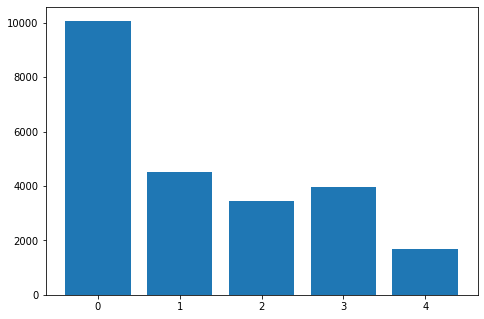

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.show()

In [15]:

white = Races.index('[1. 0. 0. 0. 0.]')
black = Races.index('[0. 1. 0. 0. 0.]')
asian = Races.index('[0. 0. 1. 0. 0.]')
indian = Races.index('[0. 0. 0. 1. 0.]')
other = Races.index('[0. 0. 0. 0. 1.]')


In [ ]:
!ls

drive  sample_data  UTKFace  UTKFace.tar.gz


In [16]:
print('/content/UTKFace/' + file_names[white])

/content/UTKFace/35_0_0_20170119201459165.jpg


In [17]:
from IPython import display
display.Image('/content/UTKFace/' + file_names[white])

In [18]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0, 
    validation_split = 0.3
)

In [19]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "training", 
    shuffle = False
)


Found 16594 validated image filenames belonging to 5 classes.


In [29]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "validation", 
    shuffle = False
)



Found 7111 validated image filenames belonging to 5 classes.


<Figure size 432x288 with 0 Axes>

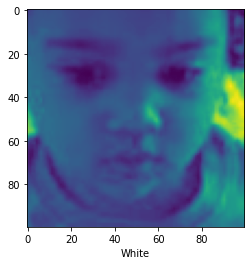

<Figure size 432x288 with 0 Axes>

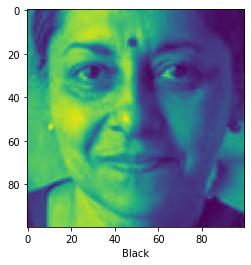

<Figure size 432x288 with 0 Axes>

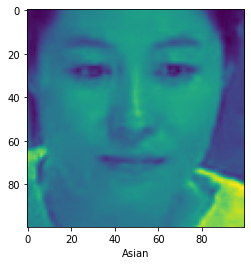

<Figure size 432x288 with 0 Axes>

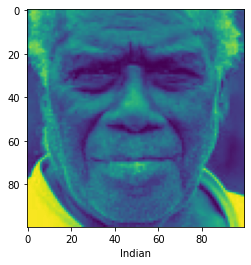

<Figure size 432x288 with 0 Axes>

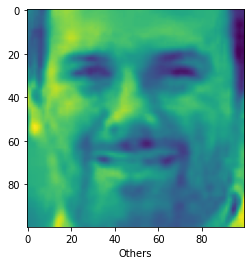

In [24]:
c = 0
for images, labels in TrainData:
  if c == 5:
    break
  for image, label in zip(images, labels):
    if label.argmax() == c:
      plt.figure()
      fig, ax = plt.subplots()
      plt.xlabel(classes_labels[c])
      plt.imshow(image.reshape((100, 100)))
      c += 1

In [20]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(5, activation = "softmax")(output)

In [121]:
model = models.Model(inputs = input, outputs = output)

In [122]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [123]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


### **Initial Model**

In [124]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 1.2813 - accuracy: 0.5031 - val_loss: 1.1451 - val_accuracy: 0.5510
Epoch 2/10
519/519 [==============================] - 20s 39ms/step - loss: 1.1154 - accuracy: 0.5825 - val_loss: 1.1352 - val_accuracy: 0.5806
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0374 - accuracy: 0.6185 - val_loss: 1.0613 - val_accuracy: 0.6050
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9804 - accuracy: 0.6426 - val_loss: 0.9623 - val_accuracy: 0.6401
Epoch 5/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9486 - accuracy: 0.6555 - val_loss: 0.9301 - val_accuracy: 0.6546
Epoch 6/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9147 - accuracy: 0.6690 - val_loss: 0.9390 - val_accuracy: 0.6510
Epoch 7/10
519/519 [==============================] - 20s 39ms/step - loss: 0.8847 - accuracy: 0.6766 - val_loss: 0.8974 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


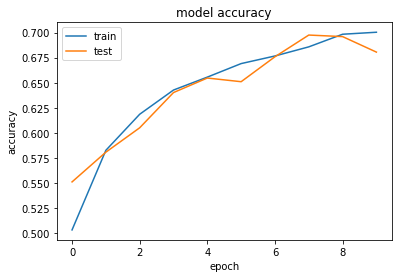

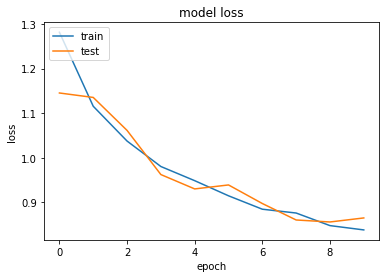

In [125]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

519/519 [==============================] - 15s 29ms/step


#### Train Data Results (Momentum = 0)

In [171]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TrainData.labels)

print(classification_report(y_true, y_pred_bool))

519/519 [==============================] - 15s 30ms/step
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1177
           1       0.76      0.42      0.54      2789
           2       0.84      0.55      0.66      2378
           3       0.81      0.78      0.79      3192
           4       0.64      0.94      0.76      7058

    accuracy                           0.70     16594
   macro avg       0.71      0.54      0.55     16594
weighted avg       0.71      0.70      0.66     16594



#### Test Data Results (Momentum = 0)

In [172]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       515
           1       0.72      0.40      0.51      1186
           2       0.81      0.53      0.64      1056
           3       0.78      0.76      0.77      1334
           4       0.63      0.92      0.75      3020

    accuracy                           0.68      7111
   macro avg       0.65      0.52      0.53      7111
weighted avg       0.68      0.68      0.64      7111



**Momentum** or **SGD with momentum** is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging in compare to stochastic gradient descent.
A momentum, is a moving average of our gradients. We then use it to update the weight of the network. Here is how the weights are updated using momentum:


$$velocity = momentum * velocity - learningRate * g$$
$$w = w + velocity$$

It considers the amount of weight increment in the previous iteration as well. Thus, if the optimization algorithm is moving in a general direction, the momentum causes it to ‘resist’ changes in direction.

A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step

### Momentum = 0.5

In [253]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(5, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [254]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 25s 47ms/step - loss: 1.2521 - accuracy: 0.5174 - val_loss: 1.1864 - val_accuracy: 0.5417
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0599 - accuracy: 0.6088 - val_loss: 1.0269 - val_accuracy: 0.6106
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9836 - accuracy: 0.6414 - val_loss: 0.9396 - val_accuracy: 0.6564
Epoch 4/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9425 - accuracy: 0.6593 - val_loss: 0.8717 - val_accuracy: 0.6902
Epoch 5/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9056 - accuracy: 0.6745 - val_loss: 0.8868 - val_accuracy: 0.6732
Epoch 6/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8796 - accuracy: 0.6861 - val_loss: 1.0075 - val_accuracy: 0.6365
Epoch 7/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8627 - accuracy: 0.6936 - val_loss: 0.9270 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


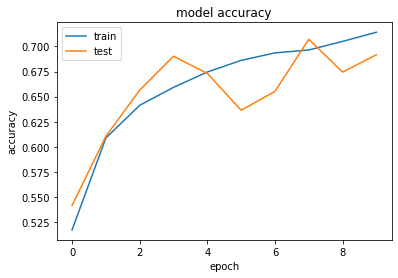

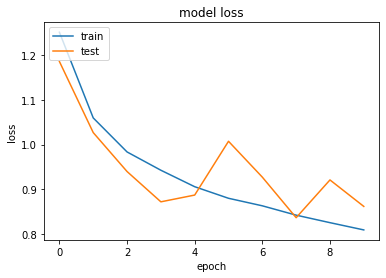

In [255]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [256]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 27ms/step
              precision    recall  f1-score   support

           0       0.43      0.01      0.02       515
           1       0.76      0.39      0.52      1186
           2       0.76      0.64      0.69      1056
           3       0.83      0.73      0.78      1334
           4       0.63      0.93      0.75      3020

    accuracy                           0.69      7111
   macro avg       0.68      0.54      0.55      7111
weighted avg       0.70      0.69      0.66      7111



#### As it can be seen, with momentum = 0.5 we have a faster convergence in compare to the momentum = 0 case

### Momentum = 0.9

In [258]:
model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [259]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0883 - accuracy: 0.5997 - val_loss: 1.0427 - val_accuracy: 0.6067
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0237 - accuracy: 0.6254 - val_loss: 0.9075 - val_accuracy: 0.6742
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0052 - accuracy: 0.6297 - val_loss: 0.9958 - val_accuracy: 0.6140
Epoch 4/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9616 - accuracy: 0.6533 - val_loss: 0.9480 - val_accuracy: 0.6545
Epoch 5/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9380 - accuracy: 0.6653 - val_loss: 0.9238 - val_accuracy: 0.6667
Epoch 6/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9083 - accuracy: 0.6771 - val_loss: 0.8436 - val_accuracy: 0.6995
Epoch 7/10
519/519 [==============================] - 21s 40ms/step - loss: 0.9171 - accuracy: 0.6724 - val_loss: 0.9064 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


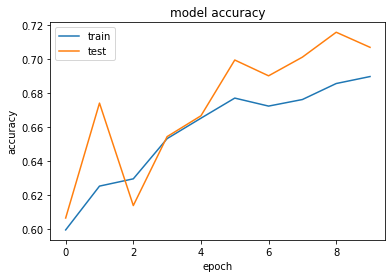

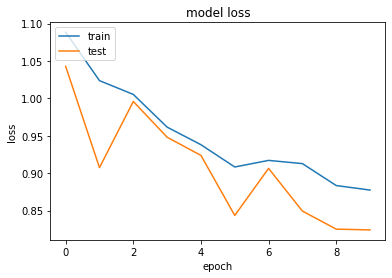

In [260]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

#### The **momentum factor** is too large and it is skipping the minimum point with huge steps. Therefore, it is giving worse results in compare to the momentum = 0.5 case

In [261]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 27ms/step
              precision    recall  f1-score   support

           0       0.31      0.02      0.03       515
           1       0.54      0.74      0.63      1186
           2       0.76      0.72      0.74      1056
           3       0.80      0.72      0.76      1334
           4       0.74      0.80      0.77      3020

    accuracy                           0.71      7111
   macro avg       0.63      0.60      0.58      7111
weighted avg       0.69      0.71      0.69      7111



### Results Compared:

X                  | Momentum = 0 | Momentum = 0.5 | Momentum = 0.9 |
-------------------|--------------|----------------|----------------|
Accuracy           | 68%          |         69%    |          71%   |

A too large momentum value might cause the algorithm to jump over the minimum value with a huge step.

## **Adam Optimizer**

In [262]:
model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [263]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9073 - accuracy: 0.6793 - val_loss: 0.8679 - val_accuracy: 0.6943
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8723 - accuracy: 0.6934 - val_loss: 0.9802 - val_accuracy: 0.6422
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8613 - accuracy: 0.6945 - val_loss: 0.8656 - val_accuracy: 0.6972
Epoch 4/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8476 - accuracy: 0.7004 - val_loss: 0.8628 - val_accuracy: 0.6981
Epoch 5/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8337 - accuracy: 0.7075 - val_loss: 0.9379 - val_accuracy: 0.6635
Epoch 6/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8270 - accuracy: 0.7090 - val_loss: 0.8197 - val_accuracy: 0.7135
Epoch 7/10
519/519 [==============================] - 21s 40ms/step - loss: 0.8215 - accuracy: 0.7121 - val_loss: 0.8594 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


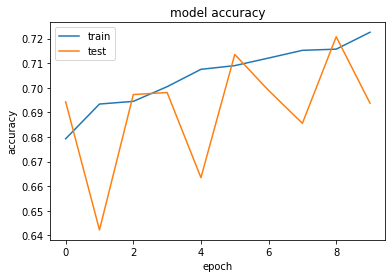

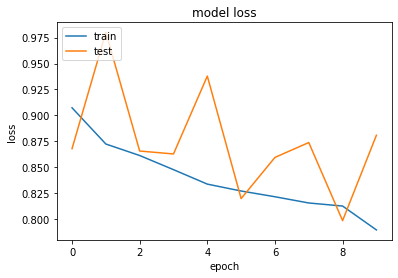

In [264]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [266]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 27ms/step
              precision    recall  f1-score   support

           0       0.21      0.03      0.06       515
           1       0.75      0.34      0.47      1186
           2       0.76      0.69      0.72      1056
           3       0.68      0.82      0.75      1334
           4       0.69      0.89      0.77      3020

    accuracy                           0.69      7111
   macro avg       0.62      0.56      0.55      7111
weighted avg       0.67      0.69      0.66      7111



The Adam optimizer isn't resulting as well as the SGD Momentum optimizer.

## **Epochs**

In [268]:
model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [269]:
history = model.fit(TrainData, validation_data = TestData, epochs = 20)

Epoch 1/20
519/519 [==============================] - 21s 40ms/step - loss: 0.8099 - accuracy: 0.7133 - val_loss: 0.8017 - val_accuracy: 0.7207
Epoch 2/20
519/519 [==============================] - 21s 40ms/step - loss: 0.7886 - accuracy: 0.7246 - val_loss: 0.8146 - val_accuracy: 0.7120
Epoch 3/20
519/519 [==============================] - 21s 41ms/step - loss: 0.7815 - accuracy: 0.7270 - val_loss: 0.7949 - val_accuracy: 0.7234
Epoch 4/20
519/519 [==============================] - 21s 40ms/step - loss: 0.7781 - accuracy: 0.7278 - val_loss: 0.7990 - val_accuracy: 0.7263
Epoch 5/20
519/519 [==============================] - 22s 42ms/step - loss: 0.7740 - accuracy: 0.7286 - val_loss: 0.9313 - val_accuracy: 0.6766
Epoch 6/20
519/519 [==============================] - 22s 42ms/step - loss: 0.7673 - accuracy: 0.7336 - val_loss: 0.8451 - val_accuracy: 0.7036
Epoch 7/20
519/519 [==============================] - 21s 40ms/step - loss: 0.7671 - accuracy: 0.7329 - val_loss: 0.8126 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


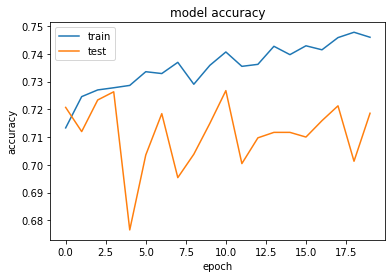

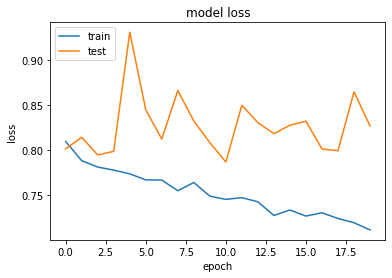

In [270]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [271]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 27ms/step
              precision    recall  f1-score   support

           0       0.30      0.01      0.01       515
           1       0.69      0.58      0.63      1186
           2       0.80      0.65      0.72      1056
           3       0.82      0.74      0.78      1334
           4       0.68      0.91      0.78      3020

    accuracy                           0.72      7111
   macro avg       0.66      0.58      0.58      7111
weighted avg       0.70      0.72      0.69      7111



##### As the number of epochs increases, we get closer to overfitting. In other words, the difference between the train accuracy and test accuracy increases. The train accuracy becomes better and the test accuracy becomes worse.
##### Therefore, using a higher number of epochs isn't always a good idea. 

##### We should try different epoch sizes to prevent both underfitting and overfitting.

## **Loss Functions**

In [274]:
model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = "mean_squared_error", metrics = ["accuracy"])

In [275]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 0.1156 - accuracy: 0.6936 - val_loss: 0.1187 - val_accuracy: 0.6818
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 0.1091 - accuracy: 0.6999 - val_loss: 0.1037 - val_accuracy: 0.7016
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 0.0942 - accuracy: 0.7160 - val_loss: 0.0949 - val_accuracy: 0.6857
Epoch 4/10
519/519 [==============================] - 21s 40ms/step - loss: 0.0778 - accuracy: 0.7379 - val_loss: 0.0835 - val_accuracy: 0.7180
Epoch 5/10
519/519 [==============================] - 21s 40ms/step - loss: 0.0740 - accuracy: 0.7441 - val_loss: 0.0798 - val_accuracy: 0.7232
Epoch 6/10
519/519 [==============================] - 21s 40ms/step - loss: 0.0723 - accuracy: 0.7509 - val_loss: 0.0840 - val_accuracy: 0.7186
Epoch 7/10
519/519 [==============================] - 21s 40ms/step - loss: 0.0728 - accuracy: 0.7488 - val_loss: 0.0795 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


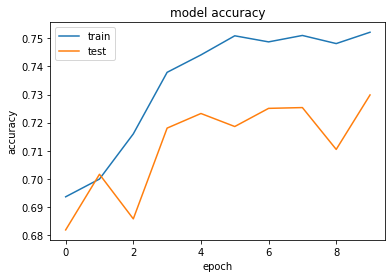

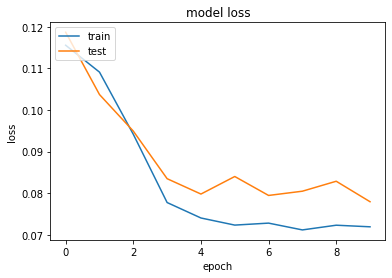

In [276]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

####The accuracies are almost fixed after 4-5 epochs

In [277]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 6s 28ms/step
              precision    recall  f1-score   support

           0       0.29      0.04      0.08       515
           1       0.69      0.62      0.65      1186
           2       0.71      0.77      0.74      1056
           3       0.75      0.81      0.78      1334
           4       0.75      0.84      0.79      3020

    accuracy                           0.73      7111
   macro avg       0.64      0.62      0.61      7111
weighted avg       0.70      0.73      0.71      7111



#### MSE isn't an appropriate loss function for classification problems for two main reasons:

1. Using MSE means that we assume that the underlying data has been generated from a normal distribution. By applying the maximum likelihood estimation (MLE),assuming that the data is from a normal distribution(a wrong assumption, by the way), we get the MSE as a Cost function for optimizing our model. 

$$ \text{MSE} = \frac{1}{2m} \sum_{i = 1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 $$

2. The MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.

## **Regularization**


In [33]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(512, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(5, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.0001))(output)

In [34]:
model = models.Model(inputs = input, outputs = output)

In [35]:
model.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [36]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 85s 162ms/step - loss: 1.6340 - accuracy: 0.5168 - val_loss: 1.3257 - val_accuracy: 0.5992
Epoch 2/10
519/519 [==============================] - 81s 155ms/step - loss: 1.1905 - accuracy: 0.6071 - val_loss: 1.1126 - val_accuracy: 0.6439
Epoch 3/10
519/519 [==============================] - 81s 156ms/step - loss: 1.0936 - accuracy: 0.6370 - val_loss: 1.0171 - val_accuracy: 0.6678
Epoch 4/10
519/519 [==============================] - 81s 155ms/step - loss: 1.0173 - accuracy: 0.6553 - val_loss: 0.9618 - val_accuracy: 0.6789
Epoch 5/10
519/519 [==============================] - 81s 156ms/step - loss: 0.9674 - accuracy: 0.6690 - val_loss: 0.9334 - val_accuracy: 0.6815
Epoch 6/10
519/519 [==============================] - 81s 156ms/step - loss: 0.9307 - accuracy: 0.6825 - val_loss: 0.9181 - val_accuracy: 0.6849
Epoch 7/10
519/519 [==============================] - 81s 155ms/step - loss: 0.9145 - accuracy: 0.6862 - val_loss: 0.9242 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


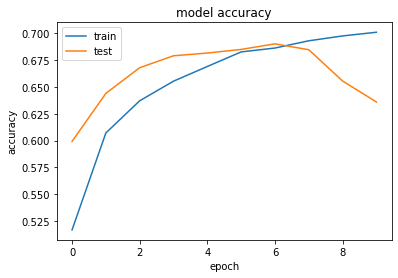

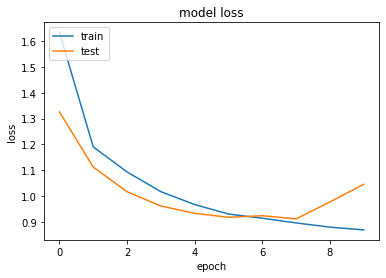

In [37]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

#### Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

#### We could say that the model is overfitting if there was a significant difference in the train accuracy and test accuracy. 


In [38]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 12s 52ms/step
              precision    recall  f1-score   support

           0       0.14      0.00      0.01       491
           1       0.65      0.41      0.50      1200
           2       0.80      0.51      0.62      1031
           3       0.92      0.45      0.60      1337
           4       0.58      0.95      0.72      3052

    accuracy                           0.64      7111
   macro avg       0.62      0.46      0.49      7111
weighted avg       0.66      0.64      0.60      7111



In [245]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)

output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(5, activation = "softmax")(output)
output = layers.Dropout(0.1)(output)

In [246]:
model = models.Model(inputs = input, outputs = output)

In [247]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [248]:
history = model.fit(TrainData, validation_data = TestData, epochs = 20)

Epoch 1/20
519/519 [==============================] - 22s 42ms/step - loss: 2.7274 - accuracy: 0.4611 - val_loss: 1.1870 - val_accuracy: 0.5572
Epoch 2/20
519/519 [==============================] - 22s 42ms/step - loss: 2.5675 - accuracy: 0.5317 - val_loss: 1.0242 - val_accuracy: 0.6330
Epoch 3/20
519/519 [==============================] - 21s 41ms/step - loss: 2.4793 - accuracy: 0.5644 - val_loss: 0.9561 - val_accuracy: 0.6639
Epoch 4/20
519/519 [==============================] - 22s 42ms/step - loss: 2.5201 - accuracy: 0.5772 - val_loss: 0.9596 - val_accuracy: 0.6612
Epoch 5/20
519/519 [==============================] - 22s 42ms/step - loss: 2.4288 - accuracy: 0.5963 - val_loss: 0.9132 - val_accuracy: 0.6714
Epoch 6/20
519/519 [==============================] - 21s 41ms/step - loss: 2.3490 - accuracy: 0.6071 - val_loss: 0.8792 - val_accuracy: 0.6839
Epoch 7/20
519/519 [==============================] - 22s 42ms/step - loss: 2.4215 - accuracy: 0.6101 - val_loss: 0.9844 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


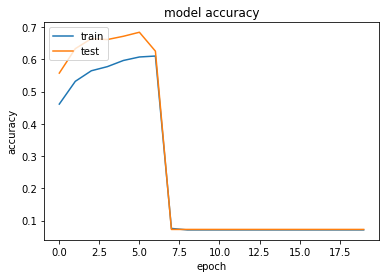

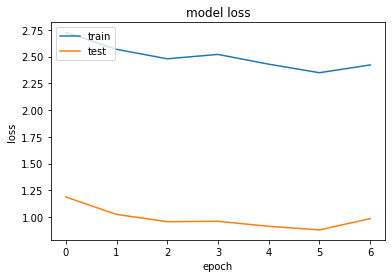

In [249]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

#### The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting